In [5]:
import os
print(os.getcwd())



C:\Users\trinh


In [7]:
import pandas as pd

df = pd.read_excel("cohort_retention.xlsx", engine="openpyxl")
df.head()


,FIRST_month,original_customers,0,1,2,3,4,5,6,7,8,9,10,11
0,1,341.0,1,0.75,0.75,0.71,0.65,0.69,0.58,0.62,0.60,0.61,0.56,0.58
1,2,138.0,1,0.55,0.52,0.44,0.54,0.42,0.46,0.51,0.43,0.43,0.41,NaN
2,3,87.0,1,0.53,0.38,0.47,0.30,0.47,0.40,0.41,0.34,0.44,NaN,NaN
3,4,72.0,1,0.43,0.53,0.36,0.43,0.44,0.44,0.40,0.40,NaN,NaN,NaN
4,5,65.0,1,0.26,0.38,0.37,0.51,0.49,0.48,0.32,NaN,NaN,NaN,NaN


In [8]:
df_melted = df.melt(
    id_vars=["FIRST_month", "original_customers"],
    var_name="month_n",
    value_name="ret_rate"
)

# Đảm bảo kiểu dữ liệu phù hợp
df_melted["month_n"] = df_melted["month_n"].astype(int)
df_melted["ret_rate"] = pd.to_numeric(df_melted["ret_rate"], errors="coerce")

# Loại bỏ giá trị NaN nếu có
df_melted.dropna(inplace=True)

df_melted.head()


,FIRST_month,original_customers,month_n,ret_rate
0,1,341.0,0,1.0
1,2,138.0,0,1.0
2,3,87.0,0,1.0
3,4,72.0,0,1.0
4,5,65.0,0,1.0


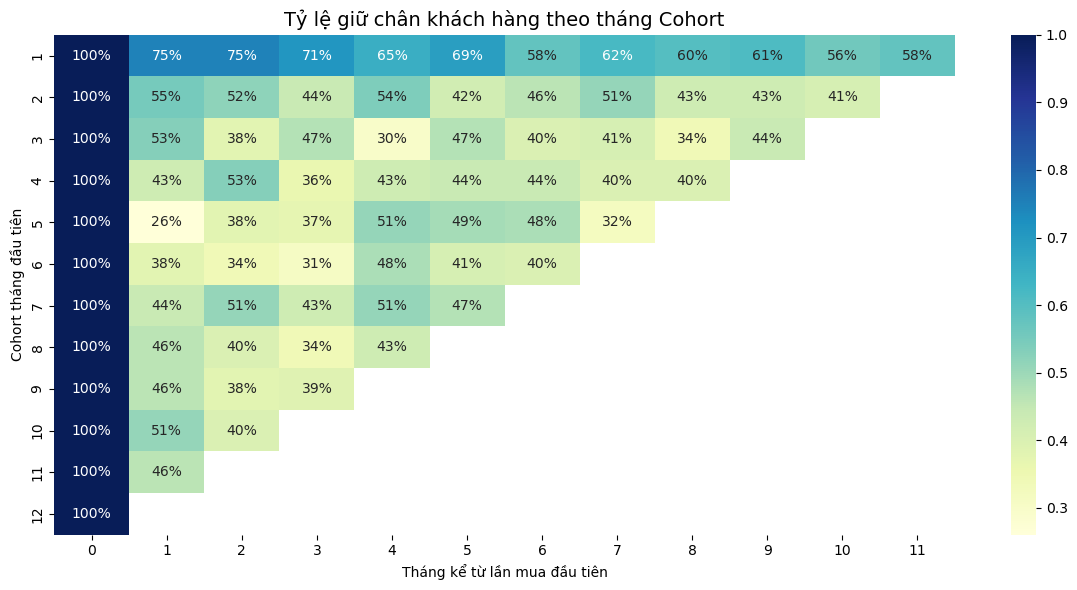

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pivot dữ liệu để vẽ heatmap
heatmap_data = df_melted.pivot(index="FIRST_month", columns="month_n", values="ret_rate")

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".0%", cmap="YlGnBu")
plt.title("Tỷ lệ giữ chân khách hàng theo tháng Cohort", fontsize=14)
plt.xlabel("Tháng kể từ lần mua đầu tiên")
plt.ylabel("Cohort tháng đầu tiên")
plt.tight_layout()
plt.show()
